<a href="https://colab.research.google.com/github/SomnathParkar/Coding/blob/main/Capstone_Project_on_Credit_Card_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import libraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# libraries for logistic regression
from sklearn.linear_model import LogisticRegression
# libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
# libraries for k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
# libraries for support vector machine
from sklearn.svm import SVC
# libraries for naive bayes
from sklearn.naive_bayes import GaussianNB
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')
# standard scalar

In [2]:
# connect google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_card = '/content/drive/MyDrive/Python Programming/creditcard.csv'

In [4]:
df_card = pd.read_csv(path_card)
# first five rows of the data
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# value counts of different classes
# 0 --> Normal Transaction
# 1 --> Fraudlent Transaction
# SMOTE: Synthetic Minority Oversampling Technique; it is a statistical method
# to create a balanced training set for machine learning , by generating synthetic samples
df_card.Class.value_counts()

,count
Class,
0,284315
1,492


In [6]:
# copy of the data
data = df_card.copy()

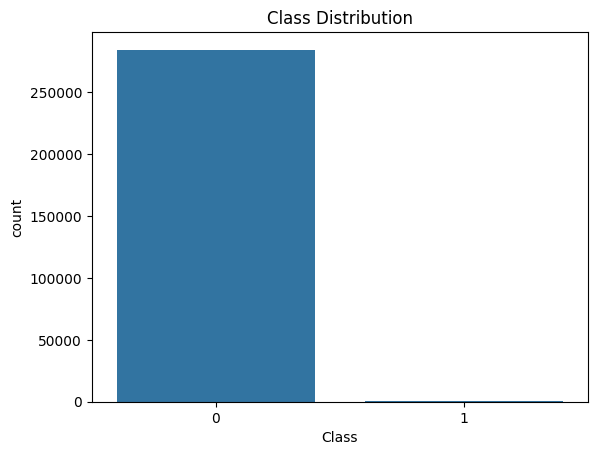

In [7]:
# count plot
sns.countplot(x='Class', data= data)
plt.title('Class Distribution')
plt.show()

In [8]:
# standard scaler
from sklearn.preprocessing import StandardScaler
# robust scaler
from sklearn.preprocessing import RobustScaler

In [9]:
# We can balance the ouliers by using Robust Scaler
robust_sclr = RobustScaler()
data['Amount'] = robust_sclr.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = robust_sclr.fit_transform(data['Time'].values.reshape(-1,1))

In [10]:
# as values of class 1 are too low so we will use SMOTE
# libraries for SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = data.drop(columns=['Class'])
y = data.Class
x_smote, y_smote = smote.fit_resample(X,y)

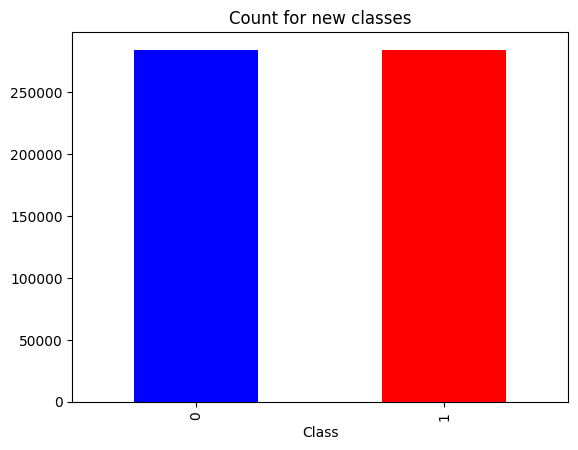

In [11]:
# recheck the values of y_smote
y_smote.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Count for new classes")
plt.show()

In [12]:
# perform the train test split
train_x, test_x, train_y, test_y = train_test_split(x_smote, y_smote, test_size=0.2)

In [13]:
#train the model
lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression()

In [14]:
# Evaluate the model
y_pred = lr.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.9474966146703481
